In [1]:
!pip install yfinance


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
stock = yf.download("AAPL", start="2018-01-01", end="2024-01-01")

stock.head()


/tmp/ipython-input-1596199856.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.304180,40.313541,39.602261,39.812839,102223600
2018-01-03,40.297153,40.839972,40.233983,40.367346,118071600
2018-01-04,40.484341,40.587289,40.262067,40.369693,89738400
2018-01-05,40.945255,41.031824,40.489009,40.580258,94640000
2018-01-08,40.793186,41.087991,40.694914,40.793186,82271200


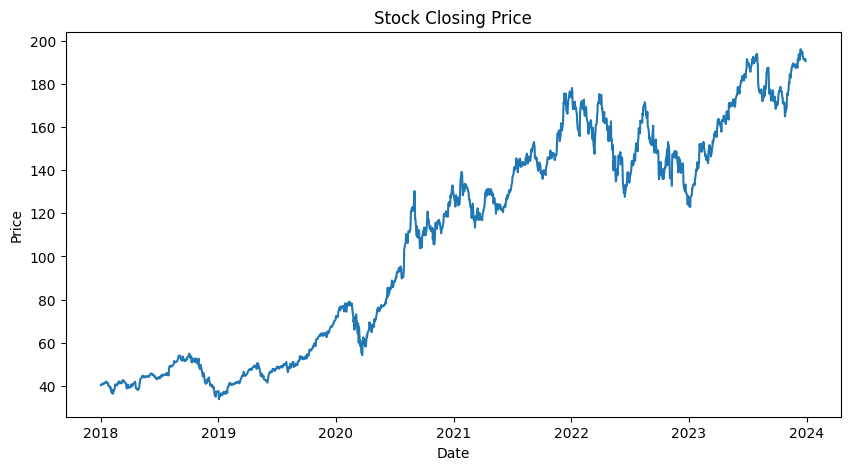

In [4]:
plt.figure(figsize=(10,5))
plt.plot(stock['Close'])
plt.title("Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [5]:
stock['Prediction'] = stock['Close'].shift(-1)

stock = stock.dropna()

X = np.array(stock[['Close']])
y = np.array(stock['Prediction'])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
predictions = model.predict(X_test)


In [9]:
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))


Mean Squared Error: 5.925195348981253
R2 Score: 0.9844299002534468


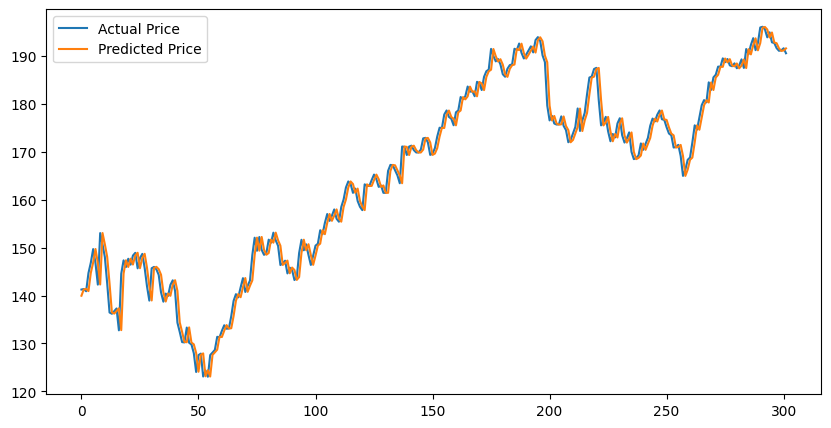

In [10]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.show()


In [11]:
last_close = stock[['Close']].iloc[-1].values.reshape(1,-1)
tomorrow_price = model.predict(last_close)

print("Predicted Next Day Price:", tomorrow_price[0])


Predicted Next Day Price: 191.5580437523824
